# SCANIA APS FAILURE 

### Overview

The Air Pressure System (APS) is an essential part of a heavy duty vehicle, where compressed air is used to press the piston that applies pressure on brake pads to stop the vehicle. It is also used in gear systems of these vehicles. The advantages of having an APS other than a hydraulic setup is the easy availability and sustainability of air from
nature.

This dataset consists of data, sourced from heavy duty Scania trucks, available publicly from the UCI machine learning repository. It consists of failure cases of the trucks during operation. The challenge was to predict the failure of the Air Pressure System (APS) in Scania trucks to avoid failure during truck operation which may lead to high maintenance cost.


The data can be found at:
https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

### ML Formulation

This is a **Binary Classification** problem where the positive class tells us that the failure was due to a specific component of the APS, whereas, the negative class tells us that the failure has nothing to do with that component. 

Therefore, given a new datapoint (sensor information), we must build a model that would tell us if the failure was due to APS or not. If the model misses an APS failure, it may prove to be detremental during operation.

### Business Constraints

1. Latency must be fairly low, to detect a failure in the APS and avoid increase in maintenance cost.


2. Cost of misclassification is very high since an APS failure which is not detected can lead to failure of the truck during operation and increase in maintenance cost.

### About the dataset

The training dataset consists of **60,000 datapoints** and **171 features**, of which one is the class label. The features are a combination of numerical data and histogram bins data. The feature names are kept anonymized for proprietary reasons. 59,000 data points belong to the negative class and the remaining 1,000 belong to the positive class.

### Performance Metric

We will be using **Macro-F1 Score** as our performance metric for this project. Macro F1 score takes in to account the F1 scores of each class. It may be beneficial in showing us the performance of our model based on the number of correctly classified points for both classes. This is useful because the cost of misclassification is very high since an APS failure which is not detected can lead to failure of the truck during operation and increase in maintenance cost.

**Macro F1-score = average(F1-SCORE of all classes)**

# Exploratory Data Analysis + Data Preprocessing

## Import Required Packages

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from prettytable import PrettyTable
import pickle


import warnings
warnings.filterwarnings("ignore")

## Reading the data 

**Training Set**

In [2]:
x = pd.read_csv("../aps_failure_training_set.csv",skiprows=20,na_values=["na"])
print(x.shape)
x.head()

(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [3]:
print("Total number of Train datapoints: ",x.shape[0])
print("Total number of features: ",x.shape[1])

print("The column/feature names given are:\n ",list(x.columns))

Total number of Train datapoints:  60000
Total number of features:  171
The column/feature names given are:
  ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'c

## Basic Pre-Processing and Analysis

### Class label Preprocessing

In [4]:
def get_correct_label(y):
    """
    This function converts the class labels
    from 'neg' and 'pos' to 0 and 1 respectively
    """
    return y.replace(['neg','pos'],[0,1])

print(x['class'].unique())
x['class'] = get_correct_label(x['class'])
print(x['class'].unique())

['neg' 'pos']
[0 1]


### Class Distribution

Here, we will look into the distribution of our dataset. In ideal cases, we prefer a balanced dataset (equal number of positive and negative datapoints)

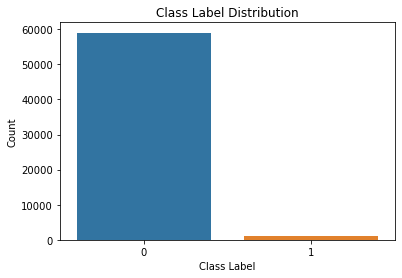

The number of positive class points is:  1000
The number of negative class points is:  59000


In [5]:
# Plotting the distribution of class label
sns.barplot(x['class'].unique(),x['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('The number of positive class points is: ',x['class'].value_counts()[1])
print('The number of negative class points is: ',x['class'].value_counts()[0])

**Observation:**

This dataset is **highly imbalanced** as the number of negative class points are much much more than the positive class points. We can choose to upsample the minority class datapoints, or use a modified classifier to tackle this problem.

### Checking for single value features

Out of the available features, the ones that have the same value for all datapoints do not hold much importance in improving performance of our model. Hence, we can discard those features.

We can remove the features that have standard deviation = 0 

In [6]:
def constant_value(df):
    """
    This function returns a list of columns
    that have std. deviation of 0
    meaning, all values are constant
    """
    constant_value_feature = []
    info = df.describe()
    for i in df.columns:
        if info[i]['std']==0:
            constant_value_feature.append(i)
    df.drop(constant_value_feature,axis=1,inplace=True)
    return df,constant_value_feature

x , dropped_feature = constant_value(x)
print("The features that are dropped due to having a constant value (0 std. dev.) are: ",dropped_feature)
print("Shape of our feature set: ",x.shape)

The features that are dropped due to having a constant value (0 std. dev.) are:  ['cd_000']
Shape of our feature set:  (60000, 170)


### Missing Values

Our dataset is known to have a high number of missing values. Lets have a closer look into it

In [7]:
# Creating a dictionary whose keys are the column names and values are the percentage of missing values
nan_count = {k:list(x.isna().sum()*100/x.shape[0])[i] for i,k in enumerate(x.columns)}

# Sorting the dictionary in descending order based on the percentage of missing values
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

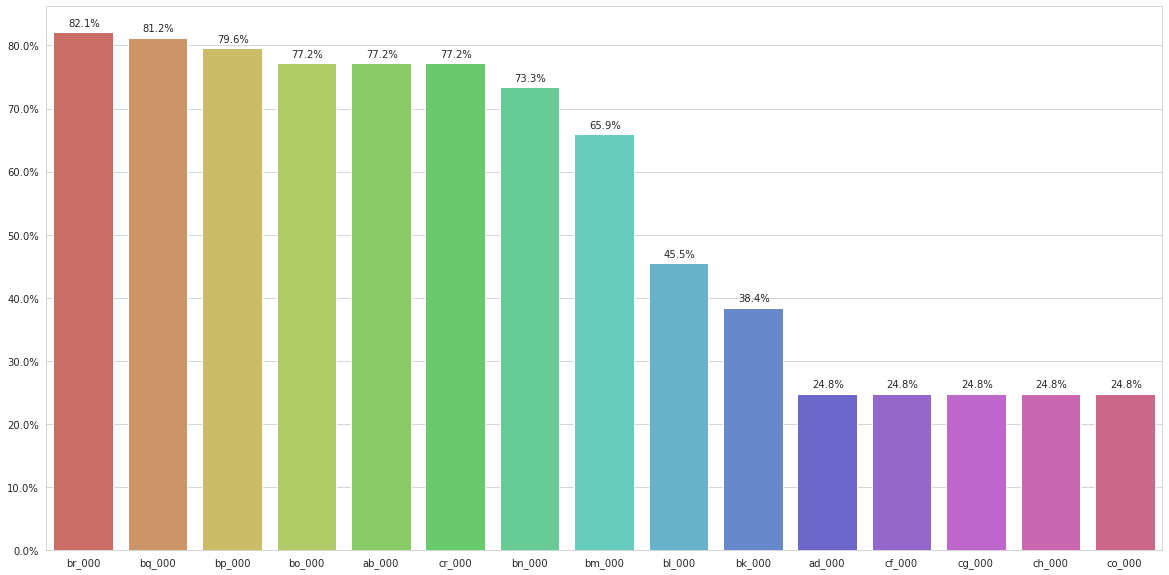

In [8]:
# Plotting a graph showing the top 15 features having highest percentage of missing values 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(nan_count.keys())[:15],y = list(nan_count.values())[:15],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

**Observation:**

* It is very evident that the some features have more than 50% missing values out of the total 60,000 datapoints. In the next section, we will see how to handle our missing data.

## Handling Missing Data

**How do we handle the missing values?**
* We will discard features with more than 70% missing values. 
* For features with missing values less than 5%, we can drop those rows. 
* For features with missing values between 5-15%, we will impute those missing values using mean/median. 
* Now for the rest of the features with missing value% between 15-70% missing values, use model based imputation technique.

**Dropping features and rows**

In [9]:
def remove_na(df,nan_feat):
    """
    This function removes features having more than 70%
    missing data, and removes rows that have NA values
    from features that have less than 5% missing data
    
    """
    
    # Removing features having more than 70% NA
    df = df.dropna(axis = 1, thresh=18000)

    # Removing rows having NA from above created list of features
    df = df.dropna(subset=nan_feat)

    # Reset Index values 
    df = df.reset_index(drop=True)
    return df

print("Earlier shape of x:",x.shape)

# List of features having less than 5% NA
na_5 = [k for k,v in nan_count.items() if v < 5]

x = remove_na(x,na_5)
print("Shape after removal of rows and columns:",x.shape)
print("Number of features having missing values below 5%:",len(na_5))

Earlier shape of x: (60000, 170)
Shape after removal of rows and columns: (55973, 163)
Number of features having missing values below 5%: 128


**Features Removed**

In [10]:
# creating a list of the top 7 features having highest number of missing values
na_70 = list(nan_count.keys())[:7]

# Total removed features
removed_features = na_70 + dropped_feature
print("Removed features are:", removed_features)

Removed features are: ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'cd_000']


**Seperating Attributes and Class Label**

In [11]:
# Seperating the class label from the other attributes after the NAN rows/columns were deleted
y_train = x['class']
x_train = x.drop('class',axis=1)

**Imputation of Missing Values**

**Model based Imputation / Multivariate Imputation by Chained Equations (MICE)**:

Ref:https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

For features having 15% to 70% missing values, we will perform an Iterative model based imputation technique called MICE. At each step, a feature with missing values is designated as output y and the other feature columns are treated as inputs X. A regressor ( we have used Ridge Regressor ) is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter (10 as default) imputation rounds. The results of the final imputation round are returned.

In [12]:
def imputation(df,mis_col):
    """
    This function imputes Missing values 
    using Median on given features, and
    Model Based Imputation on the rest
    
    """
    
    # Using sklearn's SimpleImputer
    median_imputer = SimpleImputer(missing_values=np.NaN , strategy='median',copy=True)

    # Creating a new dataframe of imputed values
    median_df = median_imputer.fit_transform(df[mis_col])
    df1 = df.copy()
    df1[mis_col] = median_df

    # Performing Model-Based Imputation
    mice_imputer = IterativeImputer(estimator=Ridge(random_state=0),
                                    random_state=0)
    imputed_df = pd.DataFrame(data = mice_imputer.fit_transform(df1) , columns= df1.columns )

    return imputed_df , median_imputer , mice_imputer


# List of feature names that have missing values between 5% to 15%.
# We will impute the missing values in features with their median
median_imputed_features = [k for k,v in nan_count.items() if v >= 5 and v < 15]

imputed_x_train , MEDIAN_imputer , MICE_imputer = imputation( x_train , median_imputed_features )
print("Number of features whose missing values are imputed with median are:\n",len(median_imputed_features))

Number of features whose missing values are imputed with median are:
 14


## Reading and Preprocessing Test Dataset

Once we read our test dataset, we will pass it through a function 'preprocess_test_data()' that will perform the complete data preprocessing.

In [13]:
x_test = pd.read_csv("../aps_failure_test_set.csv",skiprows=20,na_values=["na"])
print(x_test.shape)
print("Total number of Train datapoints: ",x_test.shape[0])
print("Total number of features: ",x_test.shape[1])
x_test.head()

(16000, 171)
Total number of Train datapoints:  16000
Total number of features:  171


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [14]:
def preprocess_test_data( x , na_features , median_features , imputer_median , imputer_mice):
    # Replace 'neg' and 'pos' with 0,1 in our dataset
    x['class'] = x['class'].replace(['neg','pos'],[0,1])
    
    # Seperate Class label from the rest of the dataset
    y = x['class']
    x = x.drop('class',axis=1)
    
    # Drop Features with high percentage of missing values
    x = x.drop(na_features , axis=1)
    
    x[median_features] = imputer_median.transform(x[median_features])
    
    x = pd.DataFrame(data = imputer_mice.transform(x) , columns= x.columns )
    
    return x,y


x_test , y_test = preprocess_test_data(x_test,
                                       removed_features,
                                       median_imputed_features,
                                       MEDIAN_imputer,
                                       MICE_imputer )
print("Shape of Test data:",x_test.shape)

Shape of Test data: (16000, 162)


#### Saving our preprocessed data and preprocessing models

In [18]:
# Save TRAIN SET
# Code to save our csv file to avoid re-doing above imputations every time
df_to_save = imputed_x_train.copy()
df_to_save['class'] = y_train
df_to_save.to_csv("../imputed_train_data.csv",index=False)

# Save TEST SET
# Code to save our csv file to avoid re-doing above imputations every time
df_to_save = x_test.copy()
df_to_save['class'] = y_test
df_to_save.to_csv("../imputed_test_data.csv",index=False)

In [19]:
imputed_x_train = pd.read_csv("../imputed_train_data.csv")
y_train = imputed_x_train['class']
imputed_x_train = imputed_x_train.drop('class',axis=1)

## Seperating the two types of features

It was given to us that certain features are histogram bin information, and the prefix (letter before the ' _ ') is the Identifier and the suffix is the bin_id.(Identifier_Bin)

To find the features that are contain histogram bin information, we know that all features from a single histogram have the same prefix. 

In [20]:
def Identifier_Bin_count(x):
    """
    This function finds the identifiers
    and the number of bins in each identifier
    """
    prefix = []
    # For each feature name, find it's Identifier and count  
    for name in x.columns:
        prefix.append(name.split('_')[0])
    counter = Counter(prefix)
    return list(counter.keys()),list(counter.values())

feature_prefix , bin_count = Identifier_Bin_count(imputed_x_train)

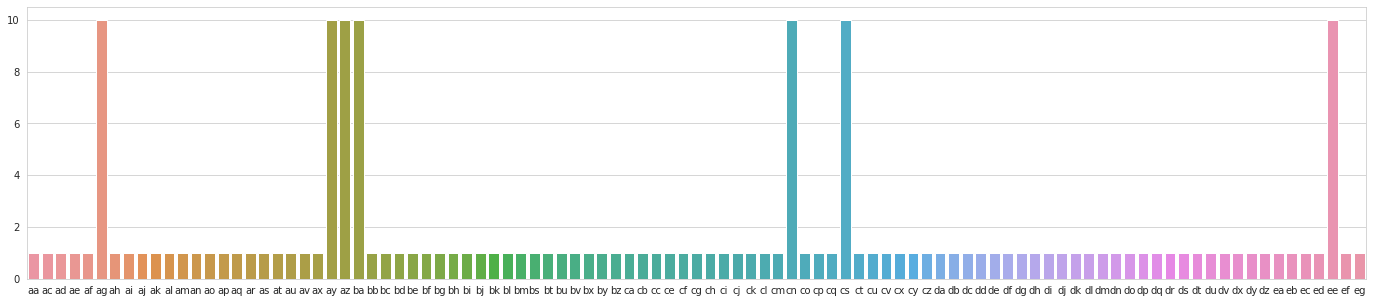

In [21]:
# Plotting the same
plt.figure(figsize=(24,5))
sns.barplot(x = feature_prefix,y = bin_count)
plt.show()

**Observation:**

We can see that there are 7 sets of features having 10 bins each. In other words, there are **7 histograms divided into 10 bins each**. 

eg: Identifier 'ag' consists of ag_000, ag_001, ag_002, ag_003, ag_004, ag_005, ag_006, ag_007, ag_008 and ag_009

In [15]:
# Getting the Identifier of the histogram features
hist_identifier = [feature_prefix[i] for i,j in enumerate(bin_count) if j==10]
print("The Histogram Identifiers are: ",hist_identifier)

# Getting the names of the features having histograms bin information
hist_features = [i for i in x_train.columns if i.split('_')[0] in hist_identifier]
print("\nThere are",len(hist_features),"features that contain histogram bin information and they are: \n",hist_features)

The Histogram Identifiers are:  ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

There are 70 features that contain histogram bin information and they are: 
 ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']


#### Seperating Histogram Features from the rest

In [16]:
histogram_data = imputed_x_train[hist_features]
x_without_hist = imputed_x_train.drop(hist_features,axis=1)

**We will select the top features from both the datasets using the complete imputed set. But the Analysis will be performed on the data having missing values.**

## Histogram Feature Selection

### Select Top Features

Now, we will perform data analysis on the top 15 features from our histogram dataset.
For selecting the features, we will perform **Recursive Feature Elimination**.

In [18]:
def get_top(df,y,n):
    """
    This function returns the top n features,
    by performing Recursive Feature Elimination
    using Random Forest Classifier
    """
    # Use RFE algorithm from sklearn to perform feature selection
    feature_select = RFE(estimator=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=1),
                         n_features_to_select=n,
                         verbose=5)
    feature_select.fit(df,y)

    # support_ gives an array of True/False for each feature where True signifies that the feature is selected
    top_f = [ c for i,c in enumerate(df.columns.tolist()) if feature_select.support_[i] ]   
    return top_f

top_feature_hist = get_top(histogram_data,y_train,15)
print("The top features selected after Recursive Feature Elimination are: \n",top_feature_hist)

Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

In [17]:
# Create a dataframe which is a subset of our original dataset and consists of only the top features and the class label

# WE WILL BE USING THE DATA WHICH CONSISTS OF MISSING VALUES FOR OUR EDA
top_features = pd.DataFrame(data=x_train[top_feature_hist],columns=top_feature_hist)
top_features['class'] = y_train
top_features.head()

,ag_001,ag_002,ag_003,ay_005,ay_006,ay_008,ba_002,ba_003,ba_004,cn_000,cn_004,cs_002,cs_004,ee_003,ee_005,class
0,0.0,0.0,0.0,469014.0,4239660.0,755876.0,415432.0,287230.0,310246.0,0.0,1309472.0,267998.0,428776.0,493384.0,469792.0,0
1,0.0,0.0,0.0,71510.0,772720.0,99560.0,199512.0,154298.0,137280.0,0.0,1179502.0,164860.0,272956.0,178064.0,245416.0,0
2,0.0,0.0,0.0,0.0,870456.0,1450312.0,332340.0,254892.0,189596.0,0.0,1215280.0,56362.0,100326.0,159812.0,409564.0,0
3,0.0,0.0,318.0,0.0,0.0,5596.0,304.0,102.0,74.0,0.0,2170.0,24.0,692.0,46.0,44.0,0
4,0.0,0.0,0.0,372236.0,2128914.0,584074.0,338762.0,236540.0,182278.0,0.0,2497104.0,80950.0,186242.0,229790.0,347188.0,0


## Top Histogram Features Analysis

### Univariate Analysis of Histogram Features

Feature 'ag_001' , Class Label 1, Mean: 42503.54
Standard Deviation 232360.91 

Feature 'ag_001' , Class Label 0, Mean: 114.5
And Standard Deviation is 5281.05 


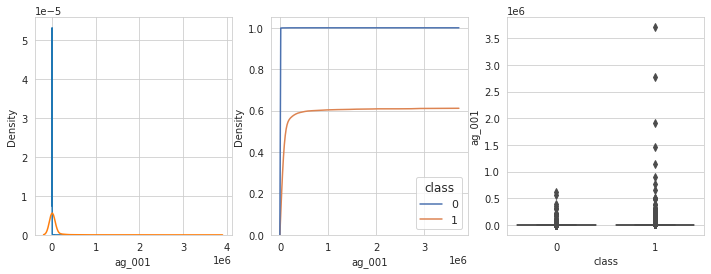

****************************************************************************************************
Feature 'ag_002' , Class Label 1, Mean: 320375.83
Standard Deviation 822733.38 

Feature 'ag_002' , Class Label 0, Mean: 1203.01
And Standard Deviation is 32764.93 


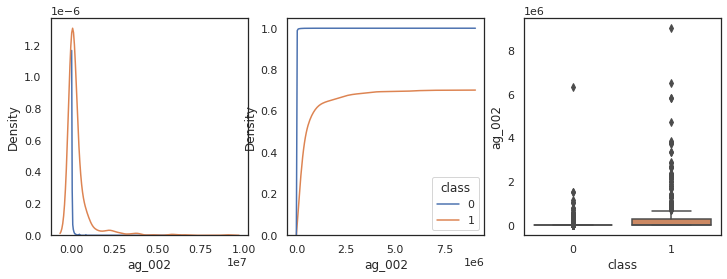

****************************************************************************************************
Feature 'ag_003' , Class Label 1, Mean: 2038674.17
Standard Deviation 3278082.14 

Feature 'ag_003' , Class Label 0, Mean: 29728.63
And Standard Deviation is 351415.59 


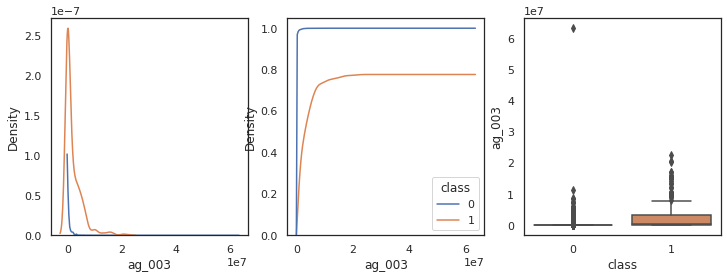

****************************************************************************************************
Feature 'ay_005' , Class Label 1, Mean: 1034242.09
Standard Deviation 4858700.79 

Feature 'ay_005' , Class Label 0, Mean: 54497.11
And Standard Deviation is 535247.53 


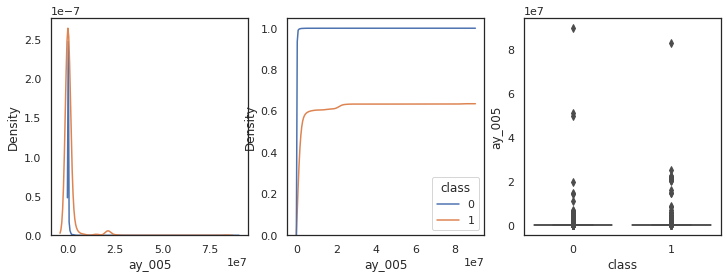

****************************************************************************************************
Feature 'ay_006' , Class Label 1, Mean: 4650066.56
Standard Deviation 10313604.8 

Feature 'ay_006' , Class Label 0, Mean: 886393.89
And Standard Deviation is 1942371.11 


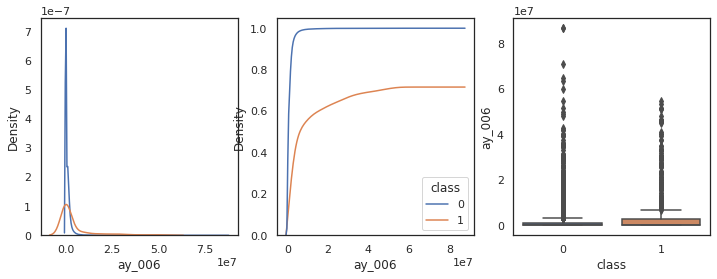

****************************************************************************************************
Feature 'ay_008' , Class Label 1, Mean: 12522092.96
Standard Deviation 14692657.97 

Feature 'ay_008' , Class Label 0, Mean: 669370.15
And Standard Deviation is 2232769.33 


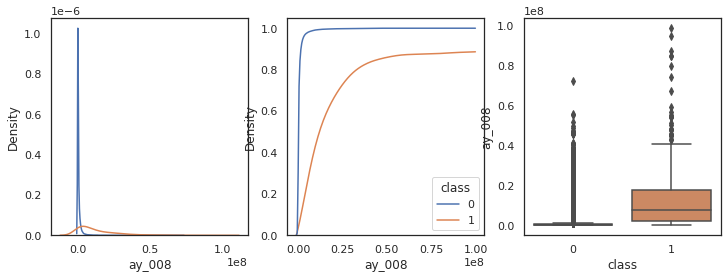

****************************************************************************************************
Feature 'ba_002' , Class Label 1, Mean: 3117128.09
Standard Deviation 2908748.3 

Feature 'ba_002' , Class Label 0, Mean: 275677.46
And Standard Deviation is 645388.32 


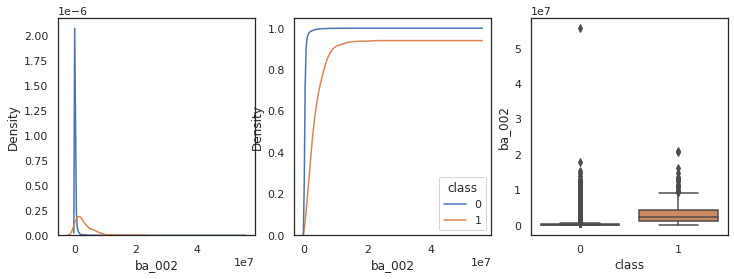

****************************************************************************************************
Feature 'ba_003' , Class Label 1, Mean: 2099777.07
Standard Deviation 1947424.14 

Feature 'ba_003' , Class Label 0, Mean: 187948.58
And Standard Deviation is 397302.96 


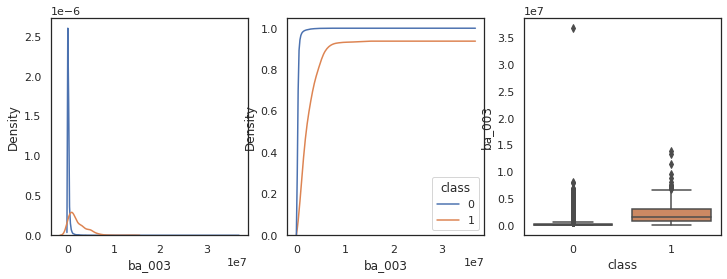

****************************************************************************************************
Feature 'ba_004' , Class Label 1, Mean: 1571623.13
Standard Deviation 1522554.8 

Feature 'ba_004' , Class Label 0, Mean: 144615.66
And Standard Deviation is 288026.2 


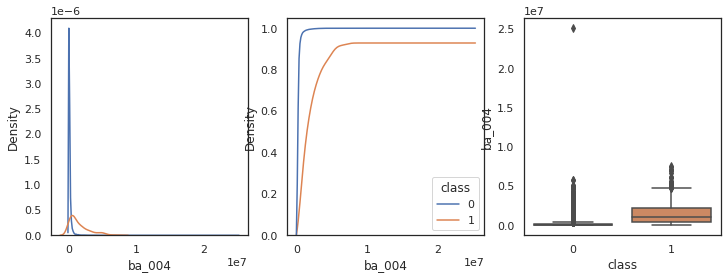

****************************************************************************************************
Feature 'cn_000' , Class Label 1, Mean: 116715.71
Standard Deviation 471065.04 

Feature 'cn_000' , Class Label 0, Mean: 410.59
And Standard Deviation is 17339.97 


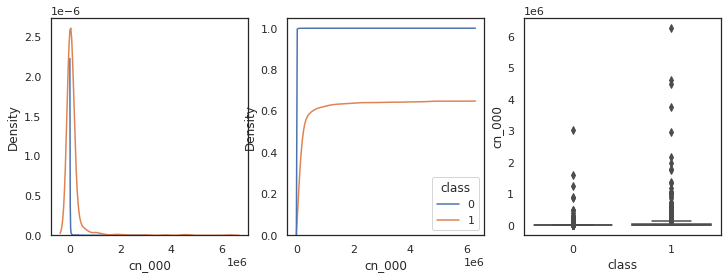

****************************************************************************************************
Feature 'cn_004' , Class Label 1, Mean: 9901680.81
Standard Deviation 10102304.72 

Feature 'cn_004' , Class Label 0, Mean: 900314.56
And Standard Deviation is 1907121.93 


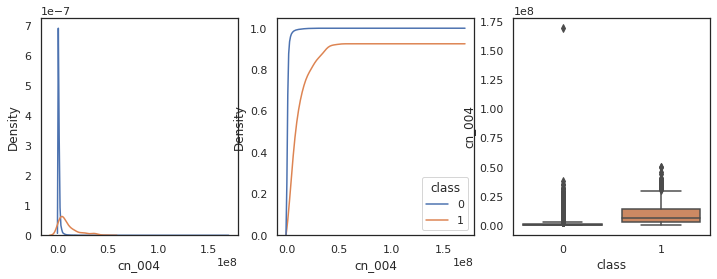

****************************************************************************************************
Feature 'cs_002' , Class Label 1, Mean: 2905755.64
Standard Deviation 3685371.14 

Feature 'cs_002' , Class Label 0, Mean: 126004.95
And Standard Deviation is 683806.88 


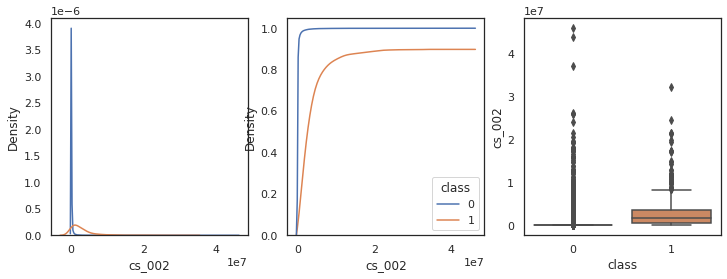

****************************************************************************************************
Feature 'cs_004' , Class Label 1, Mean: 5780159.69
Standard Deviation 8907309.94 

Feature 'cs_004' , Class Label 0, Mean: 241717.18
And Standard Deviation is 1026424.43 


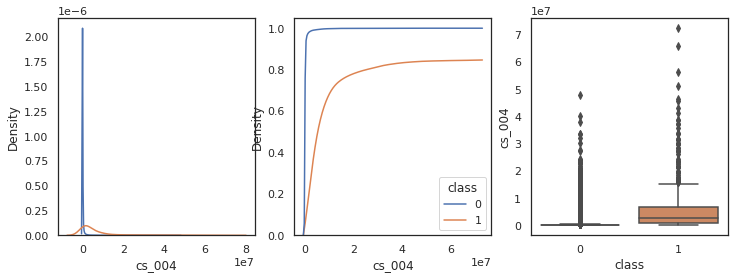

****************************************************************************************************
Feature 'ee_003' , Class Label 1, Mean: 1586282.44
Standard Deviation 1900148.65 

Feature 'ee_003' , Class Label 0, Mean: 159675.15
And Standard Deviation is 339293.25 


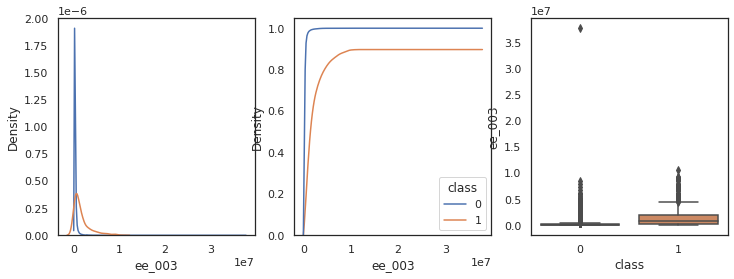

****************************************************************************************************
Feature 'ee_005' , Class Label 1, Mean: 3597279.1
Standard Deviation 4318345.11 

Feature 'ee_005' , Class Label 0, Mean: 286959.68
And Standard Deviation is 527650.47 


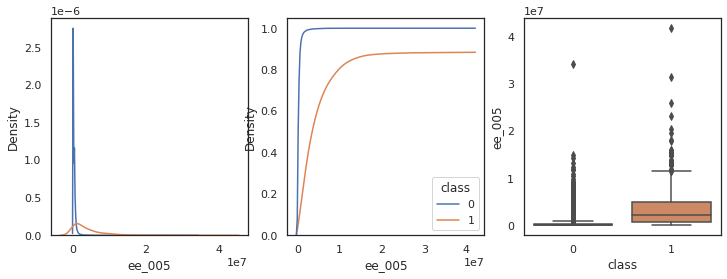

****************************************************************************************************


In [20]:
def plots(x):
    """
    This function prints Mean and Std. Deviation of points of each class,
    plots the Probability Density Function,Cumulative Density Function 
    and the Box-Plot of each feature of the given data
    """
    for n in x.columns.tolist():
        if n != 'class':

            describe_0 = x[x['class']==0].describe()
            describe_1 = x[x['class']==1].describe()

            fig,ax = plt.subplots(1,3,figsize=(12,4))
            
            print( '\033[1m' + "Feature '{}' , Class Label 1, Mean: {}".format(n , round(describe_1[n].iloc[1],2) ) )
            print( "Standard Deviation {} ".format( round(describe_1[n].iloc[2],2) ) )
            print( "\nFeature '{}' , Class Label 0, Mean: {}".format(n , round(describe_0[n].iloc[1],2) ) )
            print( "And Standard Deviation is {} ".format( round(describe_0[n].iloc[2],2) ) )
            
            sns.set_theme(style='white')
            # Plot PDF of points belonging to negative class
            sns.distplot(x[x['class']==0][n],ax=ax[0],hist=False)
            # Plot PDF of points belonging to positive class 
            sns.distplot(x[x['class']==1][n],ax=ax[0],hist=False)
            # Plot CDF of the feature values
            sns.kdeplot(data=x, x=x[n], hue="class",cumulative=True, common_norm=False, common_grid=True,ax=ax[1])
            # Plot the Box-Plot
            sns.boxplot(x=x['class'],y=x[n],ax=ax[2])
            plt.show()
            print('*'*100)

plots(top_features)

**Observations:**
*   Plots of features **ag_003, ay_008, ba_002, ba_003, ba_004, cn_004, cs_002, cs_004, ee_003 and ee_005** show us that the Lower values of the features indicate no failure in the APS component. A higher value clearly indicates an APS component failure


*   Around 99% values of feature **ag_001 and ay_005**, where there is no failure in the APS component, are 0.


*   We can say that in these top features, a higher value may indicate a failure in the truck's Air Pressure System


*   But, there are few cases when the values are higher than usual, but still do not lead to APS failure. Example: Feature **ee_005**

### Checking for Correlation Between the Top Features + Bivariate Analysis

Here we will check how each top feature is correlated w.r.t to other top features using the Pearson Correaltion Value. 

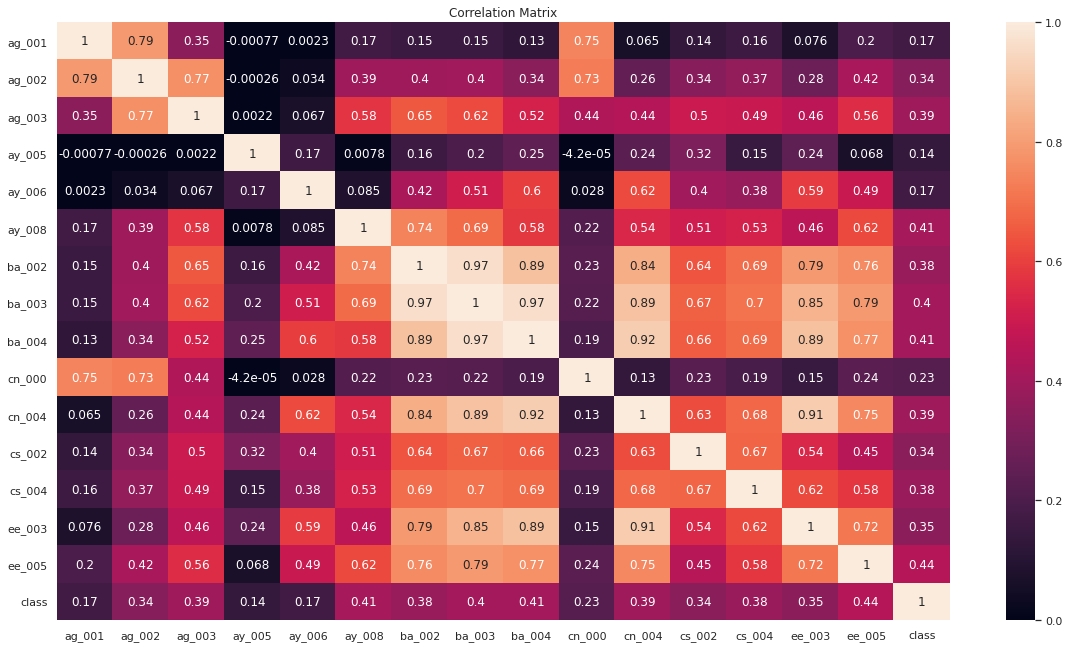

In [21]:
# Plot Correlation Heatmap      
plt.figure(figsize=(20,11))
sns.heatmap(top_features.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

**Which feature is the most uncorrelated w.r.t the target variable?** 

In [22]:
# Getting correlation coeffiecients of features w.r.t class
correlation_values = top_features.corr().loc['class']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is ay_005


**Observations:**


*   Taking into consideration only how each feature is correlated with the target variable ('class'), we can observe that feature **'ay_005'** is the most uncorrelated feature among our top attributes. 

*  We can perform further Bivariate Analysis on how the other top 5 features vary w.r.t feature 'ay_005'.

Variation of top features w.r.t feature ay_005


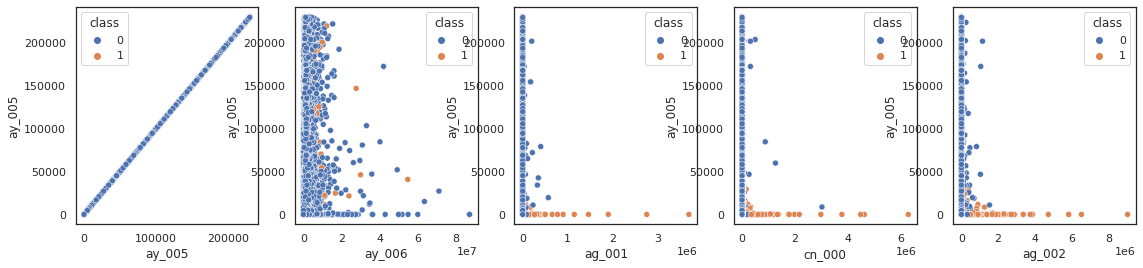

In [23]:
def plot_scatter(df,feature,percentile_value):
    """
    This function plots scatter plots between 
    all the features of the dataframe, w.r.t a given feature
    """
    fig,ax = plt.subplots(1,5,figsize=(19,4))

    # Only include the data consisting of values below the given percentile
    p = np.nanpercentile(df[feature],percentile_value)
    df = df[df[feature]<p]
    
    columns = df.columns.tolist()
    for i in range(len(columns)):
        if columns[i] !='class':
            # Plot scatterplot between 2 given features
            sns.scatterplot(x=df[columns[i]],y=df[feature],hue=df['class'],ax=ax[i])
    plt.show()


print('\033[1m'+"Variation of top features w.r.t feature",top_correlated_features[0])
plot_scatter(top_features[top_correlated_features + ['class']],top_correlated_features[0],95)

**Observations:**

*   **ag_002, ag_001, cn_000**:  It can be seen from the scatter plot that for any value of the other top features, there is failure in the APS component (class label = 1) when the value in feature 'ay_005' is nearly 0.

## Numerical Feature Selection

### Select Top Features

In [24]:
# Calling the function created earlier to select top features
top_feature_num = get_top(x_without_hist , y_train , 15)
print("The top features selected after Recursive Feature Elimination are: \n",top_feature_num)

Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 fe

In [25]:
# Create a dataframe which is a subset of our original dataset and consists of only the top features and the class label

# WE WILL BE USING THE DATA WHICH CONSISTS OF MISSING VALUES FOR OUR EDA
top_features = pd.DataFrame(data=x_train[top_feature_num],columns=top_feature_num)
top_features['class'] = y_train
top_features.head()

,aa_000,al_000,am_0,ap_000,aq_000,bj_000,bu_000,bv_000,ci_000,cj_000,cq_000,dg_000,dn_000,do_000,dx_000,class
0,76698,0.0,0.0,1766008.0,1132040.0,799478.0,6700214.0,6700214.0,5245752.00,0.0,6700214.0,0.0,62282.0,85908.0,0.0,0
1,33058,0.0,0.0,1084598.0,338544.0,392208.0,3646660.0,3646660.0,2291079.36,0.0,3646660.0,0.0,33736.0,36946.0,0.0,0
2,41040,0.0,0.0,300796.0,153698.0,139730.0,2673338.0,2673338.0,2322692.16,0.0,2673338.0,0.0,13876.0,38182.0,0.0,0
3,12,642.0,3894.0,10764.0,1014.0,3090.0,21614.0,21614.0,2135.04,0.0,21614.0,0.0,232.0,0.0,20174.0,0
4,60874,0.0,0.0,1058136.0,551022.0,399410.0,4289260.0,4289260.0,3565684.80,0.0,4289260.0,0.0,44946.0,62648.0,98334.0,0


## Top Numerical Features Analysis

### Univariate Analysis of Numerical Features

Feature 'aa_000' , Class Label 1, Mean: 535557.84
Standard Deviation 368322.35 

Feature 'aa_000' , Class Label 0, Mean: 42198.45
And Standard Deviation is 85674.99 


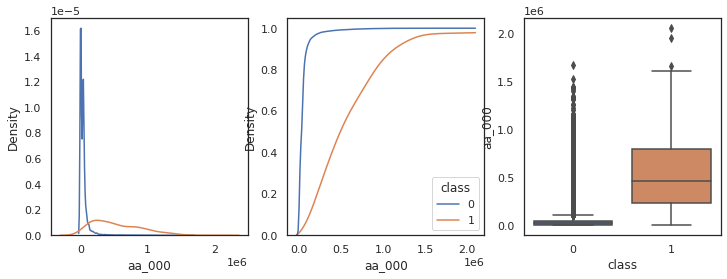

****************************************************************************************************
Feature 'al_000' , Class Label 1, Mean: 1312909.33
Standard Deviation 2272430.58 

Feature 'al_000' , Class Label 0, Mean: 21663.77
And Standard Deviation is 225571.81 


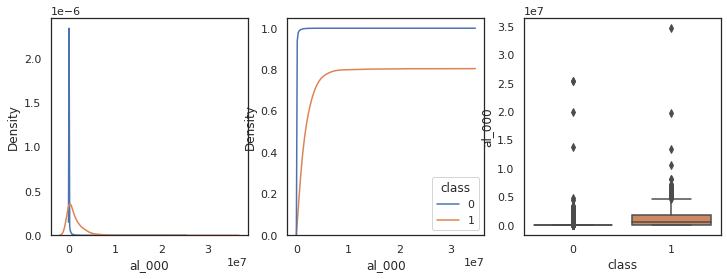

****************************************************************************************************
Feature 'am_0' , Class Label 1, Mean: 1994335.93
Standard Deviation 3270109.24 

Feature 'am_0' , Class Label 0, Mean: 32289.62
And Standard Deviation is 346731.24 


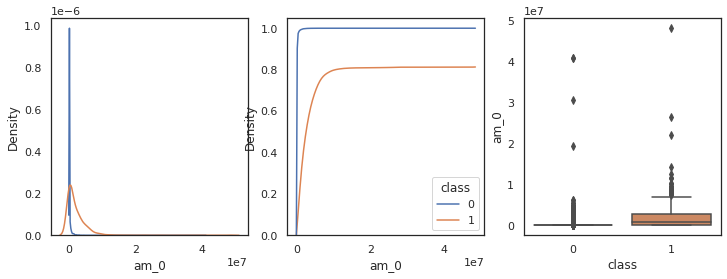

****************************************************************************************************
Feature 'ap_000' , Class Label 1, Mean: 10488936.15
Standard Deviation 8148251.03 

Feature 'ap_000' , Class Label 0, Mean: 644263.25
And Standard Deviation is 1652584.96 


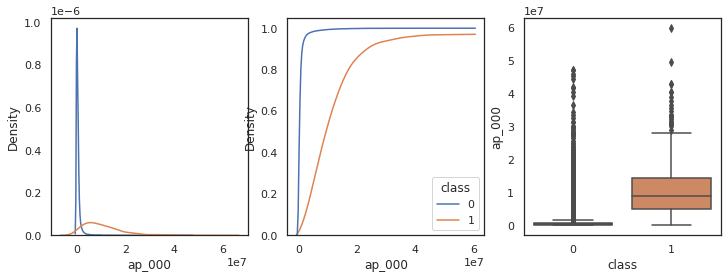

****************************************************************************************************
Feature 'aq_000' , Class Label 1, Mean: 4643078.91
Standard Deviation 3511008.41 

Feature 'aq_000' , Class Label 0, Mean: 302755.05
And Standard Deviation is 700480.39 


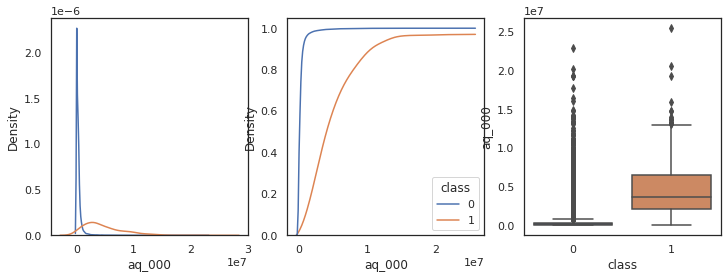

****************************************************************************************************
Feature 'bj_000' , Class Label 1, Mean: 5831411.41
Standard Deviation 4576782.56 

Feature 'bj_000' , Class Label 0, Mean: 299729.99
And Standard Deviation is 830798.42 


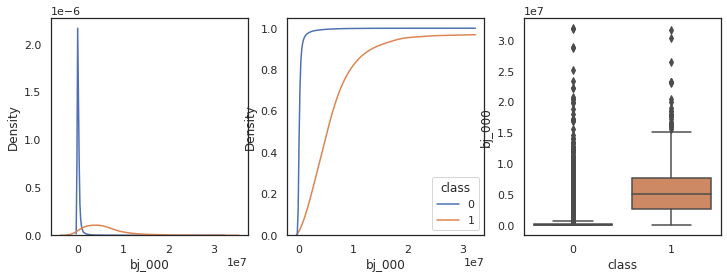

****************************************************************************************************
Feature 'bu_000' , Class Label 1, Mean: 42802828.22
Standard Deviation 27014980.92 

Feature 'bu_000' , Class Label 0, Mean: 3241405.56
And Standard Deviation is 6523062.7 


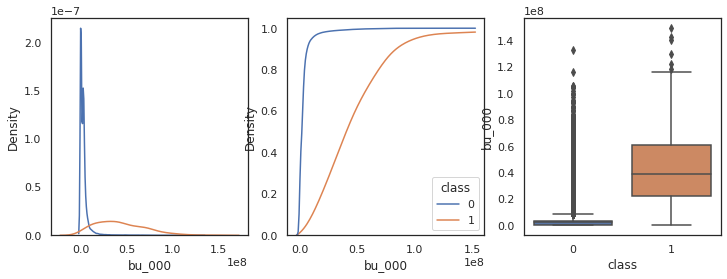

****************************************************************************************************
Feature 'bv_000' , Class Label 1, Mean: 42802836.54
Standard Deviation 27014984.75 

Feature 'bv_000' , Class Label 0, Mean: 3241405.95
And Standard Deviation is 6523063.28 


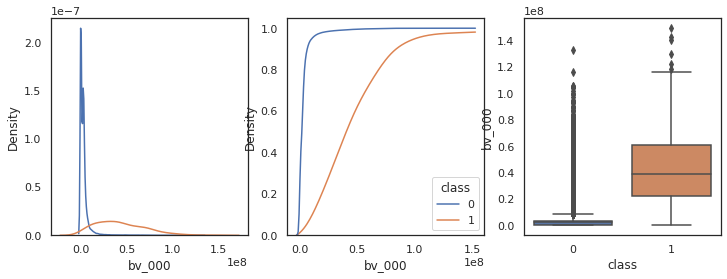

****************************************************************************************************
Feature 'ci_000' , Class Label 1, Mean: 31381992.22
Standard Deviation 20155474.63 

Feature 'ci_000' , Class Label 0, Mean: 2468026.5
And Standard Deviation is 4870368.19 


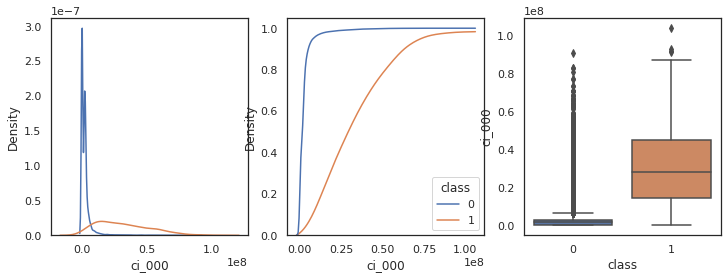

****************************************************************************************************
Feature 'cj_000' , Class Label 1, Mean: 2532895.71
Standard Deviation 5390620.1 

Feature 'cj_000' , Class Label 0, Mean: 39023.21
And Standard Deviation is 425739.22 


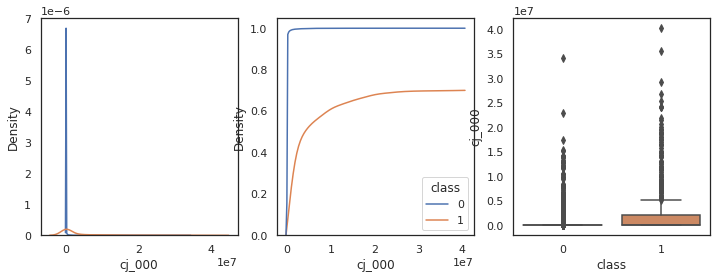

****************************************************************************************************
Feature 'cq_000' , Class Label 1, Mean: 42802828.39
Standard Deviation 27014981.02 

Feature 'cq_000' , Class Label 0, Mean: 3241405.93
And Standard Deviation is 6523063.27 


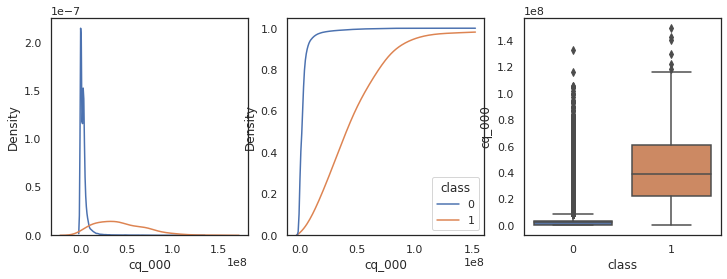

****************************************************************************************************
Feature 'dg_000' , Class Label 1, Mean: 380774.0
Standard Deviation 1590126.18 

Feature 'dg_000' , Class Label 0, Mean: 1868.74
And Standard Deviation is 91825.18 


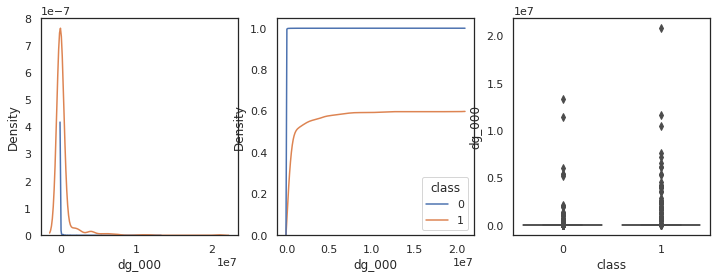

****************************************************************************************************
Feature 'dn_000' , Class Label 1, Mean: 353815.14
Standard Deviation 258573.93 

Feature 'dn_000' , Class Label 0, Mean: 23673.72
And Standard Deviation is 61790.16 


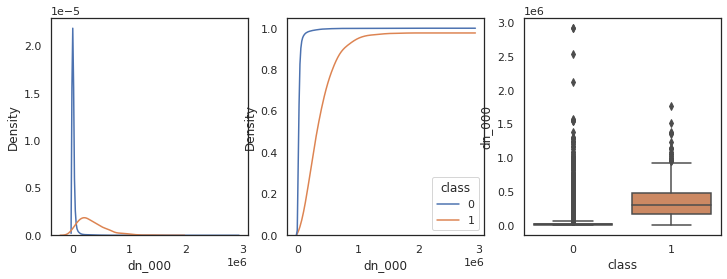

****************************************************************************************************
Feature 'do_000' , Class Label 1, Mean: 237157.12
Standard Deviation 311932.98 

Feature 'do_000' , Class Label 0, Mean: 26568.72
And Standard Deviation is 47842.76 


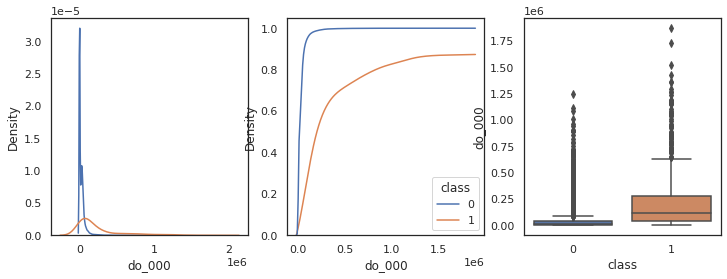

****************************************************************************************************
Feature 'dx_000' , Class Label 1, Mean: 8321052.93
Standard Deviation 16477013.07 

Feature 'dx_000' , Class Label 0, Mean: 714172.87
And Standard Deviation is 3754542.97 


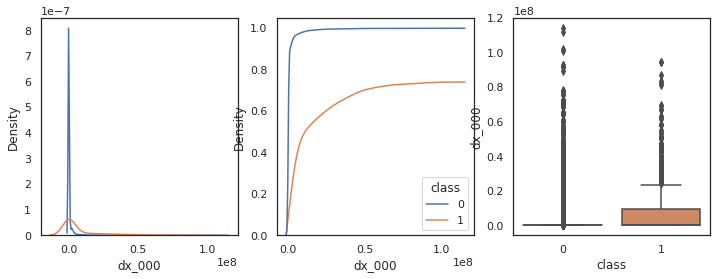

****************************************************************************************************


In [26]:
# Calling the plot function created earlier
plots(top_features)

**Observations:**

* **aa_000 :** If there is no failure in the APS (class label = 0), about 95% of the points have a value below *0.1x1e6*. A higher value than that usually indicates a failure in the APS component.


* **al_000, am_000 :** The values of instances of failure and non-failure of the APS component are not clearly seperable in this feature. Although points of the failure cases do have a slightly higher value.


* **ap_000, aq_000, bj_000, bu_000 :** Instances of failure have a higher value, compared to non-failure cases. But there are few instances of non-failure of the APS component, that see higher values in this feature.


* In all features, except **dg_000, cj_000, am_0 and al_000**, the higher values in the features usually indicate failure in APS component. But due to the Imbalanced nature of the data this may not be certain.

### Checking for Correlation Between the Top Features + Bivariate Analysis

Here we will check how each top feature is correlated w.r.t to other top features using the Pearson Correaltion Value. 

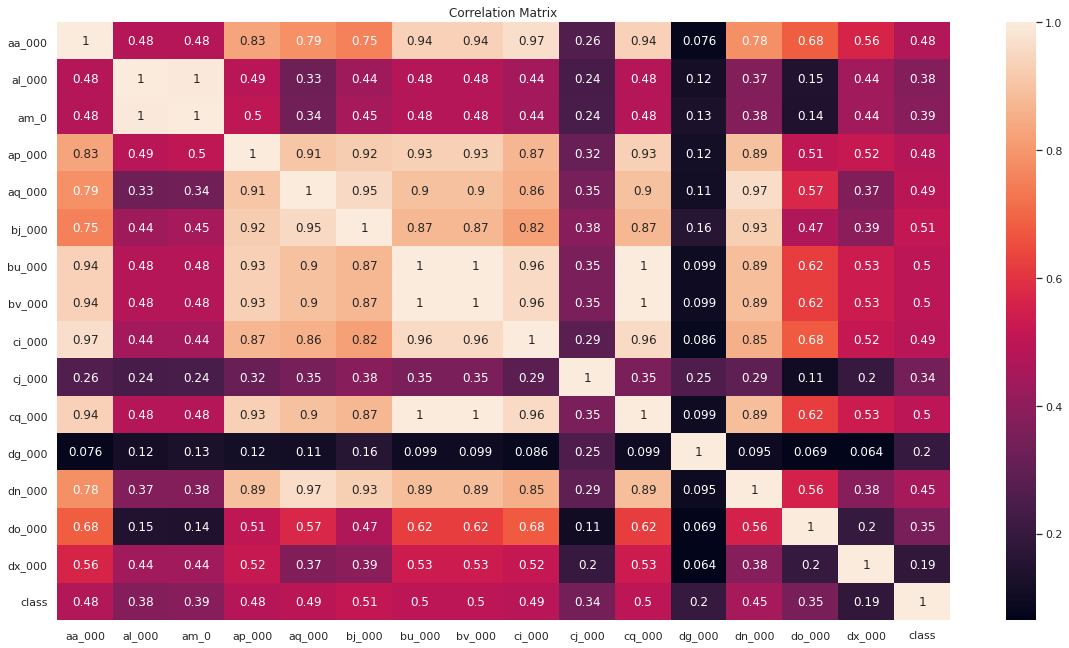

In [27]:
# Plot Correlation Heatmap      
plt.figure(figsize=(20,11))
sns.heatmap(top_features.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

**Which feature is the most uncorrelated w.r.t the target variable?** 

In [28]:
# Getting correlation coeffiecients of features w.r.t class
correlation_values = top_features.corr().loc['class']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is dx_000


**Observations:**


*   Taking into consideration only how each feature is correlated with the target variable ('class'), we can observe that feature **'dx_000'** is the most uncorrelated feature among our top attributes. 

*  We can perform further **Bivariate Analysis** on how the other top features are, w.r.t feature 'dx_000'.

Variation of top features w.r.t feature dx_000


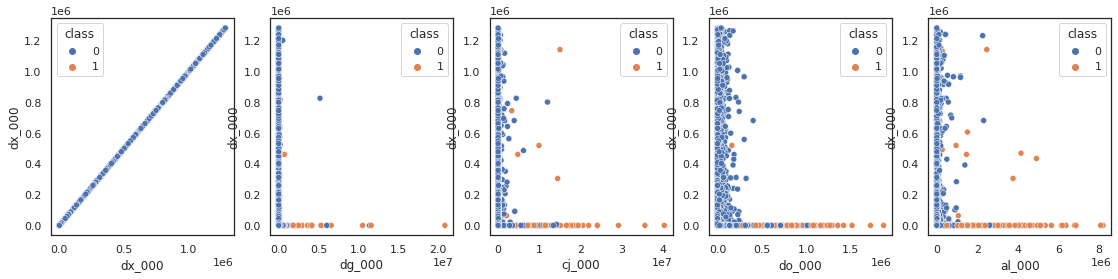

In [29]:
print('\033[1m'+"Variation of top features w.r.t feature",top_correlated_features[0])
# Calling the plot function created earlier
plot_scatter(top_features[top_correlated_features + ['class']],top_correlated_features[0],90)

**Observations:**

* The main observation in all plots here is that for any value of the remaining features, if the feature 'dx_000' has a low value ( nearly 0 ), it MAY INDICATE that there is a failure in the APS component (class label=1).

## Summarizing our EDA:

1. The dataset consists of 60,000 datapoints and 171 features including the class label.


2. After plotting the count of each class label, we found that out of 60000 points, 59000 points belong to class 0 and the remaining 1000 points belong to class 1. We are working with a highly **Imbalanced Binary Classification** problem.


3. We then went forward to check for missing values in our dataset. We observed that some features have more than 70% of their values missing. We decided to remove those features from our dataset. 7 features were thuse removed.


4. There was one feature ( cd_000 ) that had a single value for all datapoints. And we decided to remove the same, since it will not add much value to our model performance.


5. For features with less than **5%** missing data, the rows consisting of NA values were removed. Features with **5% - 15%** missing values were imputed using **median**. And features with **15% - 70%** missing values were imputed using a **model based imputation technique**.   


6. There are 70 features which consist of bin information from 7 histograms. Each histogram has 10 bins. The Histogram features are the ones which have Identifiers: **['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']**. The histogram and numerical features were seperated into two datasets and we performed **Univariate and Bivariate Analysis** on the top 15 features of both the datasets. 


7. From performing Recursive Feature Elimination with a Random Forest Classifier, we found our top 15 features from the histogram dataset to be : **['ag_001', 'ag_002', 'ag_003', 'ay_005', 'ay_006', 'ay_008', 'ba_002', 'ba_003', 'ba_004', 'cn_000', 'cn_004', 'cs_002', 'cs_004', 'ee_003', 'ee_005']**.


8. Analysis of the features show that in these top features, a higher value may indicate a failure in the truck's Air Pressure System. But, there are few cases when the values are higher than usual, but still do not lead to APS failure. Example: Feature **ee_005**. Univariate Analysis on the most uncorrelated feature w.r.t the target variable (**ay_005**) we saw that for **ag_002, ag_001, cn_000** - for any value of these other top features, there is failure in the APS component (class label = 1) when the value in feature 'ay_005' is nearly 0.


9. From performing Recursive Feature Elimination with a Random Forest Classifier, we found our top 15 features from the numerical dataset to be : **['aa_000', 'al_000', 'am_0', 'ap_000', 'aq_000', 'bj_000', 'bu_000', 'bv_000', 'ci_000', 'cj_000', 'cq_000', 'dg_000', 'dn_000', 'do_000', 'dx_000']**.


10. From Univariate Analysis, we saw that in all features, except **dg_000, cj_000, am_0 and al_000**, the higher values in the features usually indicate failure in APS component. But due to the Imbalanced nature of the data this may not be certain. Feature **'dx_000'** was the most uncorrelated feature among the top features. We performed **Bivariate Analysis** similar to the histogram top features, and the main observation in all plots here is that for any value of the remaining features, if the feature 'dx_000' has a low value ( nearly 0 ), it **MAY INDICATE** that there is a failure in the APS component (class label=1)..

# Feature Engineering

#### Loading the dataset

In [20]:
# Loading our dataset consisting of imputed data
X_train = pd.read_csv("../imputed_train_data.csv")
Y_train = X_train['class']
X_train = X_train.drop('class',axis=1)

## Scaling our Data

A target variable with a large spread of values, in turn, may result in large error gradient values during optimization, making the learning process unstable. To avoid this, we will scale our data using sklearn's **MinMaxScaler**. 

In [21]:
def scale_data(df):
    """
    This function transforms features 
    by scaling each feature to a given range
    """
    min_max = MinMaxScaler()
    df = pd.DataFrame( data = min_max.fit_transform(df) , columns = df.columns )
    return df , min_max

## Synthetic Minority Oversampling Technique (SMOTE) for Imbalanced dataset

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. One way to solve this problem is to oversample the examples in the minority class.

In [22]:
def balance_data(df,label):
    """
    This function balances the dataset by 
    creating dulicates of minority class points
    """
    over = SMOTE(sampling_strategy=0.3)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    df, label = pipeline.fit_resample(df, label)
    return df, label

X_train , Y_train = balance_data(X_train , Y_train)
print(X_train.shape)
print(Y_train.value_counts())

(49839, 162)
0    33226
1    16613
Name: class, dtype: int64


#### Saving our data

In [23]:
# Code to save our csv file to avoid re-doing above processing every time
# For TRAIN DATA
df_to_save = X_train.copy()
df_to_save['class'] = Y_train
df_to_save.to_csv("../final_train_data.csv",index=False)

In [24]:
# Loading our dataset consisting of imputed data
X_train = pd.read_csv("../final_train_data.csv")
Y_train = X_train['class']
X_train = X_train.drop('class',axis=1)

# Loading Test data
X_test = pd.read_csv("../imputed_test_data.csv")
Y_test = X_test['class']
X_test = X_test.drop('class',axis=1)

### Preparing Scaled data for Linear models

In [27]:
X_train_scale,scaler = scale_data(X_train)
X_test_scale = pd.DataFrame(data = scaler.transform(X_test) , columns=X_test.columns)
print(X_train_scale.shape,X_test_scale.shape)

(49839, 162) (16000, 162)


# Modelling

In [25]:
def tuning( x , y , model , params , cv=10 ,verbose=10 ):
    """
    This function performs HyperParameter Tuning
    using GridSearchCV for the given model and it's parameters
    """
    # Define the model that performs Hyperparameter tuning
    clf = GridSearchCV(estimator= model,
                       param_grid= params,
                       scoring= 'f1_macro',
                       cv= cv,                         
                       verbose= verbose,
                       n_jobs= -1)
    
    # Fit the model to the dataset
    clf.fit( x , y )
    return clf.best_params_ , clf.best_score_    

In [26]:
def plot_confusion( y_test , y_hat ):
    """
    This function plots the Confusion Matrix
    based on the true and predicted class labels
    """    
    # Show Confusion Matrix Heatmap
    cf_matrix_test = confusion_matrix(y_test , y_hat)
        
    group_names = ["TN","FP","FN","TP"]
    group_counts = ["{}".format(value) for value in cf_matrix_test.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [27]:
def model_results_pred( model , x_train , x_test , y_train , y_test ):
    """
    This function predicts class label of the data,
    and returns the Macro-F1 Score
    """
    # Predic class labels
    y_train_hat = model.predict(x_train)
    y_test_hat = model.predict(x_test) 
    
    f1_macro = f1_score(y_test, y_test_hat,average='macro')
    
    print('\033[1m'+'Macro-F1 Score: ',f1_macro)
    
    # Plot Test Confusion Matrix
    print("\tTest Confusion Matrix")
    plot_confusion(y_test,y_test_hat)
    
    return f1_macro

## Baseline Model using DummyClassifier

We will predict all class labels to be 0 (majority class) and calculate the F1 score for the same. We can use sklearn's DummyClassifier to obtain our baseline results.

Macro-F1 Score:  0.49407114624505927
	Test Confusion Matrix


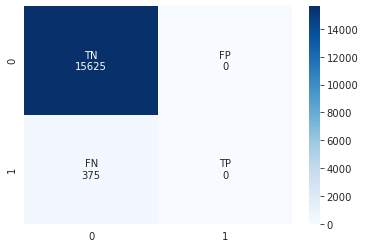

In [43]:
dummy_model = DummyClassifier(strategy='constant',constant=0)
dummy_model.fit(X_train,Y_train)

F1_Base = model_results_pred( dummy_model , X_train , X_test , Y_train , Y_test )

## Logistic Regression

### HyperParameter Tuning

In [44]:
# Defining the different parameters for tuning
params = {'C': np.random.uniform(0.001,1,5), 'tol':np.random.uniform(0.0001,0.1,5) }

# Obtain best hyperparameters
best_params_log , best_score_log = tuning(X_train_scale,
                                          Y_train,
                                          LogisticRegression(n_jobs=-1,random_state=42),
                                          params,
                                          cv=10,
                                          verbose=2)


print(" Best Parameters:",best_params_log,"with score of:",best_score_log)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.4min finished


 Best Parameters: {'C': 0.9499712741302101, 'tol': 0.010607877862448002} with score of: 0.948955848657711


### Training & Testing

Macro-F1 Score:  0.8096449507665557
	Test Confusion Matrix


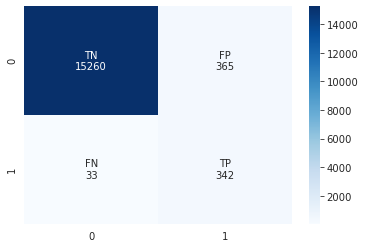

In [45]:
LR_model = LogisticRegression(C= best_params_log['C'],
                              tol= best_params_log['tol'],
                              n_jobs=-1, 
                              random_state=42)

LR_model.fit(X_train_scale,Y_train)

F1_LR = model_results_pred( LR_model , X_train_scale , X_test_scale , Y_train , Y_test)

## SGDClassifier with HingeLoss

### HyperParameter Tuning

In [46]:
# Defining the different parameters for tuning
params = {'penalty': ['l1','l2'], 'alpha':np.random.uniform(0.0001,0.1,9) }

# Obtain best hyperparameters
best_params_sgd , best_score_sgd = tuning(X_train_scale,
                                          Y_train,
                                          SGDClassifier(n_jobs=-1,random_state=0),
                                          params,
                                          cv=10,
                                          verbose=1)


print(" Best Parameters:",best_params_sgd,"with score of:",best_score_sgd)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   11.3s finished


 Best Parameters: {'alpha': 0.012454994531859762, 'penalty': 'l2'} with score of: 0.920952402326205


### Training and Testing

Macro-F1 Score:  0.7643422728579601
	Test Confusion Matrix


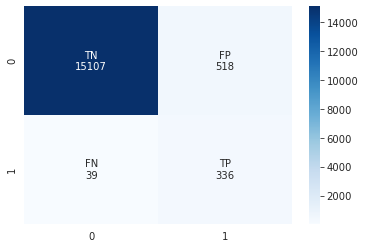

In [47]:
SVM_model = SGDClassifier(penalty= best_params_sgd['penalty'],
                          alpha= best_params_sgd['alpha'],
                          n_jobs= -1,
                          random_state= 0)

SVM_model.fit(X_train_scale,Y_train)

F1_SVM = model_results_pred( SVM_model , X_train_scale , X_test_scale , Y_train , Y_test )

## Naive Bayes

### HyperParameter Tuning

In [48]:
# Defining the different parameters for tuning
params = {'var_smoothing': np.random.uniform(1e-16,1e-14,100)}

# Obtain best hyperparameters
best_params_nb , best_score_nb = tuning(X_train,
                                        Y_train,
                                        GaussianNB(),
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params_nb,"with score of:",best_score_nb)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 345 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   31.1s finished


 Best Parameters: {'var_smoothing': 1.4853510813914007e-16} with score of: 0.9323510500671766


### Training & Testing

Macro-F1 Score:  0.7387067507147718
	Test Confusion Matrix


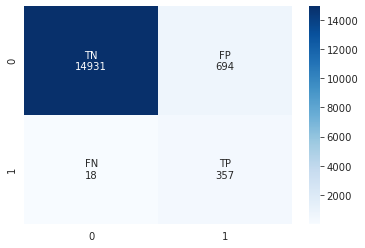

In [49]:
# Defining our model
NB_model = GaussianNB(var_smoothing=best_params_nb['var_smoothing'])


# Fit and predict, and obtain train and test scores
NB_model.fit(X_train,Y_train)

F1_NB = model_results_pred(NB_model , X_train , X_test , Y_train , Y_test)

## Decision Tree Classifier

### HyperParameter Tuning

In [50]:
# Defining the different parameters for tuning
params = {'max_depth': np.random.randint(10,25,5)}

# Obtain best hyperparameters
best_params_dt , best_score_dt = tuning(X_train,
                                        Y_train,
                                        DecisionTreeClassifier(),
                                        params,
                                        cv=11)


print(" Best Parameters:",best_params_dt,"with score of:",best_score_dt)

Fitting 11 folds for each of 5 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  42 out of  55 | elapsed:  1.0min remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  48 out of  55 | elapsed:  1.1min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.2min finished


 Best Parameters: {'max_depth': 15} with score of: 0.9858706170182184


### Training & Testing

Macro-F1 Score:  0.7735909797231266
	Test Confusion Matrix


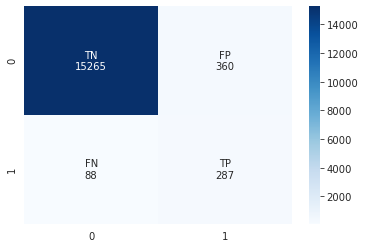

In [51]:
# Defining our model
DT_model = DecisionTreeClassifier(max_depth = best_params_dt['max_depth'])

# Fit and predict, and obtain train and test scores
DT_model.fit(X_train,Y_train)

F1_DT = model_results_pred( DT_model , X_train , X_test , Y_train , Y_test)

## Random Forest

### HyperParameter Tuning

In [28]:
params = {'n_estimators': [300,500,600,650,700],
          'max_depth': [80,110,125,135]}


# Obtain best hyperparameters
best_params_rf , best_score_rf = tuning(X_train,
                                        Y_train,
                                        RandomForestClassifier(n_jobs= -1 , verbose= 1),
                                        params,
                                        cv=7)


print(" Best Parameters:",best_params_rf,"with score of:",best_score_rf)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed: 54.8min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed: 63.5min
[Parallel(n_jobs=-1)]: Done 136 out of 140 | elapsed: 80.1min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 80.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    2.4s
[Parall

 Best Parameters: {'max_depth': 125, 'n_estimators': 700} with score of: 0.9942557786652605


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   49.3s finished


### Training and Testing

Macro-F1 Score:  0.8655888056299359
	Test Confusion Matrix


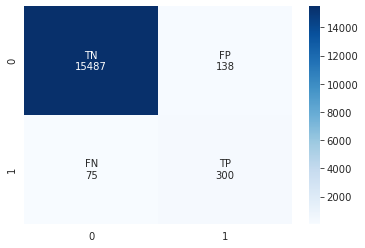

In [52]:
# Defining our model
RF_model = RandomForestClassifier(n_estimators = best_params_rf['n_estimators'],
                                  max_depth = best_params_rf['max_depth'],
                                  n_jobs = -1,
                                  verbose = 0)


# Fit and predict, and obtain train and test scores
RF_model.fit(X_train,Y_train)
# Fit and predict, and obtain train and test scores
F1_RF = model_results_pred(RF_model , X_train , X_test , Y_train , Y_test)

## Gradient Boosted Decision Trees

### HyperParameter Tuning

In [31]:
params = {'n_estimators':[100, 250,350,500],
          'max_depth': [4,6,10,15],
          'learning_rate':[0.001,0.01,0.1,1,10]}


# Obtain best hyperparameters
best_params_gb , best_score_gb = tuning(X_train,
                                        Y_train,
                                        LGBMClassifier(n_jobs=-1,random_state=42),
                                        params,
                                        cv=6)


print(" Best Parameters:",best_params_gb,"with score of:",best_score_gb)

Fitting 6 folds for each of 80 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed: 1

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
 Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500} with score of: 0.9969755275763957


### Training and Testing

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Macro-F1 Score:  0.8817895552269138
	Test Confusion Matrix


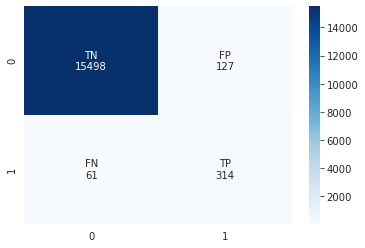

In [28]:
# Defining our model
GB_model = LGBMClassifier(n_estimators = 500,#best_params_gb['n_estimators'],
                          max_depth = 10,#best_params_gb['max_depth'],
                          learning_rate = 0.1,#best_params_gb['learning_rate'],
                          n_jobs = -1,
                          random_state = 42) 


# Fit and predict, and obtain train and test scores
GB_model.fit(X_train , Y_train)
# Fit and predict, and obtain train and test scores
F1_GB = model_results_pred(GB_model , X_train , X_test , Y_train , Y_test)

## AdaBoost Classifier

### HyperParameter Tuning

In [12]:
params = {'n_estimators':[ 400 , 600 , 650 , 700 , 750 , 800 ]}


# Obtain best hyperparameters
best_params_ab , best_score_ab = tuning(X_train,
                                        Y_train,
                                        AdaBoostClassifier(random_state=42),
                                        params,
                                        cv=4)


print(" Best Parameters:",best_params_ab,"with score of:",best_score_ab)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done   8 out of  24 | elapsed:  8.7min remaining: 17.4min
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed: 15.1min remaining: 17.9min
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed: 15.9min remaining: 11.3min
[Parallel(n_jobs=-1)]: Done  17 out of  24 | elapsed: 19.4min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed: 19.6min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 24.8min finished


 Best Parameters: {'n_estimators': 700} with score of: 0.9933439685763834


### Training and Testing

Macro-F1 Score:  0.8344643965457281
	Test Confusion Matrix


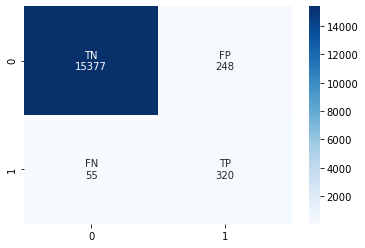

In [67]:
# Defining our model
AB_model = AdaBoostClassifier(random_state=42,
                              n_estimators = best_params_ab['n_estimators']) 


# Fit and predict, and obtain train and test scores
AB_model.fit(X_train , Y_train)
# Fit and predict, and obtain train and test scores
F1_AB = model_results_pred(AB_model , X_train , X_test , Y_train , Y_test)

## Custom Ensemble (Stacking)

**Split the Train Dataset 50-50**

In [55]:
def split_data( x , y ):
    D_1 , D_2 , Y_1 , Y_2 = train_test_split( x , y , stratify=y , test_size = 0.5 )
    
    D_1 = D_1.reset_index(drop=True)
    D_2 = D_2.reset_index(drop=True)
    
    Y_1 = Y_1.reset_index(drop=True)
    Y_2 = Y_2.reset_index(drop=True)
    
    
    return D_1 , D_2 , Y_1 , Y_2

**Sampling with replacement**

In [56]:
def generating_samples( input_data , target_data ):
    """
    This function samples 60% of 
    the given data, with replacements
    """
    selecting_rows = np.random.choice(list(range(input_data.shape[0])),
                                      size=int(0.6 * len(input_data)),
                                      replace=True)
    
    sample_data = input_data.iloc[ selecting_rows  ]
    target_of_sample_data = target_data.iloc[selecting_rows]

    return sample_data , target_of_sample_data

**Create k sample sets**

In [57]:
def sample_list( x , y , n):
    """
    This function creates a list of all
    n samples and their corresponding outputs
    """
    
    list_input_data =[]
    list_output_data =[]

    for i in range(0,n):
        a,b = generating_samples(x,y)
        list_input_data.append(a)
        list_output_data.append(b)
    return list_input_data, list_output_data 

**Obtain trained base models (Decision Tree Classifier) for each sample**

In [58]:
def train_base_models(x,y,n):
    """
    This function trains a base model for
    each of the given sample dataset
    and stores them in a dictionary
    """
    models = {}
    # For each sample dataset
    for i in tqdm(range(n)):
        # Base Model: Decision Tree Classifier
        best_model = DecisionTreeClassifier() 
        # Fit the model on the sample data
        best_model.fit( x[i] , y[i] )
        # Store the trained model
        models['model_'+str(i)] = best_model
    return models

**Pass dataset through each base model and create meta dataset**

In [59]:
def create_metadata( n , pred):
    """
    This function creates a pandas Dataframe
    consisting of the predictions of all the 
    base models as its features
    """
    df=pd.DataFrame()
    # For each base model
    for i in range(n):
        # Create feature prediction_i which consists of predictions of model i
        df['prediction_'+str(i)] = pred[i]
        
    return df

In [60]:
def predict_k_models( base, x , y ):
    """
    In this function, a dataset passes through the 
    trained base models, and creates a new dataset
    using these predictions as features
    """
    predictions = []
    # For each base model
    for model in base.values():
        # Predict class label of test data
        y_hat = model.predict(x)   
        # Append the predictions to a list
        predictions.append(y_hat)
    
    # Call function create_metadata to create new dataset
    df = create_metadata( len(base) , predictions)
    
    return df 

**Model Evaluation**

In [61]:
def ensemble_evaluation( base , meta , x , y ):
    """
    This function passes a dataset through each base model,
    merges the results into a dataframe, passes it through
    a meta model, and gives the final Macro-F1 Score
    """
    predictions=[]
    # For each base model
    for model in base.values():
        # Predict class label and add append results into a list
        y_hat = model.predict(x)
        predictions.append(y_hat)
        
    # Create a new dataset consisting of the predictions
    test_metadata = create_metadata( len(base) , predictions)
    
    # pass the new dataset through a meta model
    final_y_hat = meta.predict(test_metadata)

    return final_y_hat

**Complete model**

In [62]:
def custom_ensemble( x_train , y_train , x_test , n_estimators ):
    """
    This function runs our custom Ensemble Model
    on the given dataset
    """
    
    D_1 , D_2 , Y_1 , Y_2 = split_data( x_train , y_train )
    # Pass the dataset through each of the given functions
        
    # Generate n samples and add it into a list
    list_input_data, list_output_data = sample_list( D_1 , Y_1 , n_estimators )
        
    # Train n base models 
    base_models = train_base_models( list_input_data , list_output_data ,n_estimators )
    
    # Predict on other half of the data (D2) and create new metadataset
    model_predictions  = predict_k_models( base_models , D_2 , Y_2)
        
    # Fit the meta model to the above created dataset
    meta_model  = XGBClassifier(learning_rate=0.1,
                                max_depth= 10,
                                n_estimators=500,
                                eval_metric='logloss'
                                ).fit(model_predictions , Y_2)
        
    # Evaluate and return Macro-F1 score of the custom model
    y_hat = ensemble_evaluation( base_models , meta_model , X_test , Y_test )
    
        
    return y_hat

**HyperParameter Tuning**

In [63]:
# Specify Parameters
params = [ 100 , 150 , 200 , 300 ]

scores={}
# for each "number of base models"
for n in params:
    # Predict class label of test data for each parameter
    y_hat = custom_ensemble( X_train, Y_train , X_test , n )
    # Compute Macro-F1 score
    # Add to dictionary as (n:f1_score)
    scores[str(n)] = f1_score( Y_test , y_hat , average='macro' )
    
best_k = max(scores, key=scores.get) 
print(best_k) 

100%|██████████| 300/300 [15:34<00:00,  3.11s/it]


200


## Final Model

100%|██████████| 200/200 [10:16<00:00,  3.08s/it]


Macro-F1 score is  0.8288568708618126


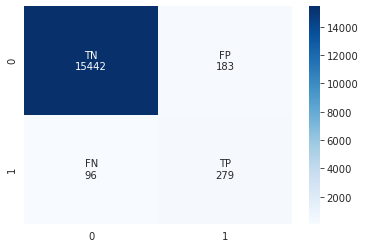

In [66]:
# Specify n_estimators
n_estimators = int(best_k)
# Predict Class labels using our custom ensemble
y_hat = custom_ensemble( X_train, Y_train , X_test , n_estimators )

# Compute Macro-F1 score
F1_custom = f1_score( Y_test , y_hat , average='macro')
print("Macro-F1 score is ",F1_custom)

# Plot Confusion Matrix
plot_confusion(Y_test , y_hat)

# Model Scores 

In [67]:
table=PrettyTable()

table.field_names = ['Model','Macro-F1 Score']
table.add_row(['Baseline',F1_Base])
table.add_row(['Logistic Regression',F1_LR])
table.add_row(['SGD using HingeLoss',F1_SVM])
table.add_row(['Naive Bayes',F1_NB])
table.add_row(['Decision Trees',F1_DT])
table.add_row(['Random Forest',F1_RF])
table.add_row(['Gradient Boosted Decision Trees',F1_GB])
table.add_row(['Adaptive Boosting',F1_AB])
table.add_row(['Custom Stacking Ensemble',F1_custom])

print(table)

+---------------------------------+---------------------+
|              Model              |    Macro-F1 Score   |
+---------------------------------+---------------------+
|             Baseline            | 0.49407114624505927 |
|       Logistic Regression       |  0.8096449507665557 |
|       SGD using HingeLoss       |  0.7643422728579601 |
|           Naive Bayes           |  0.7387067507147718 |
|          Decision Trees         |  0.7735909797231266 |
|          Random Forest          |  0.8655888056299359 |
| Gradient Boosted Decision Trees |  0.8847551341260347 |
|        Adaptive Boosting        |  0.8344643965457281 |
|     Custom Stacking Ensemble    |  0.8288568708618126 |
+---------------------------------+---------------------+
